Original Data with Nulls:
    Feature1  Feature2  Target
0        NaN -1.431007       0
1   0.656043  0.842841       1
2   0.537983 -2.056550       0
3   1.289308 -0.079023       1
4   0.720124  0.977237       1
5   0.561992 -1.635791       0
6   2.273979 -0.675682       1
7   1.565227  2.083034       1
8   1.213166  1.620637       1
9   1.286505 -0.469635       0
10  1.284172       NaN       0
11  0.822080 -1.595160       0
12  0.272539  1.510064       1
13  2.427177 -0.364402       1
14  0.263174  0.809744       1


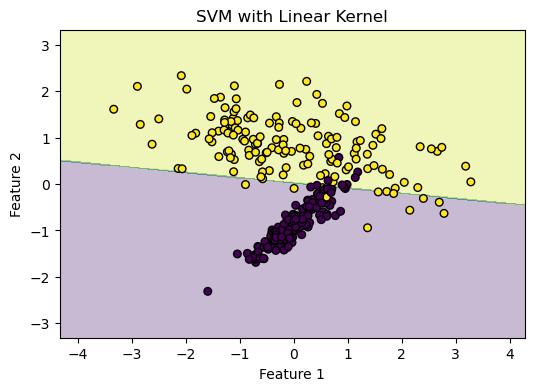

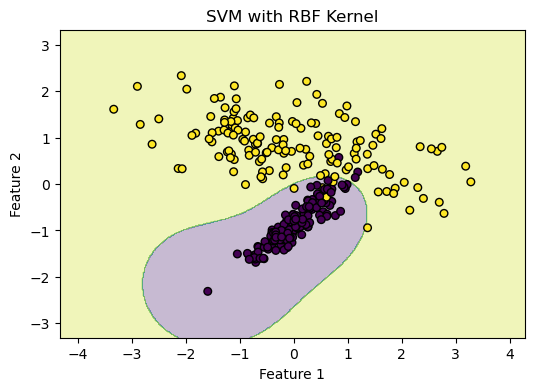

Best parameters from GridSearchCV: {'C': 1, 'gamma': 0.1}
Cross-Validation Accuracy Scores: [0.93333333 0.95       0.96666667 0.96610169 0.98305085]
Mean CV Accuracy: 0.9598305084745764

Classification Report on Test Set:
              precision    recall  f1-score   support

           0       0.90      1.00      0.95        26
           1       1.00      0.91      0.95        34

    accuracy                           0.95        60
   macro avg       0.95      0.96      0.95        60
weighted avg       0.96      0.95      0.95        60



In [8]:
# Import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.svm import SVC
from sklearn.datasets import make_classification
from sklearn.metrics import classification_report
from sklearn.preprocessing import StandardScaler


# 1. Load and prepare dataset (simulated binary classification)
X, y = make_classification(n_samples=300, n_features=2, n_informative=2, 
                           n_redundant=0, random_state=42, n_clusters_per_class=1)

# Convert to DataFrame and add null values intentionally (for demo)
df = pd.DataFrame(X, columns=['Feature1', 'Feature2'])
df['Target'] = y

# Introduce some missing values for demo
df.iloc[0, 0] = np.nan
df.iloc[10, 1] = np.nan

# Display original data
print("Original Data with Nulls:")
print(df.head(15))

# 2. Remove rows with null values
df = df.dropna()

# 3. Split features and target
X_clean = df[['Feature1', 'Feature2']].values
y_clean = df['Target'].values

# 4. Standardize features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_clean)

# 5. Split data
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y_clean, test_size=0.2, random_state=42)

# 6. Train SVM with Linear Kernel
svm_linear = SVC(kernel='linear', C=1)
svm_linear.fit(X_train, y_train)

# 7. Train SVM with RBF Kernel
svm_rbf = SVC(kernel='rbf', C=1, gamma='scale')
svm_rbf.fit(X_train, y_train)

# 8. Visualize decision boundaries
def plot_decision_boundary(model, X, y, title):
    h = 0.02
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                         np.arange(y_min, y_max, h))
    Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    plt.figure(figsize=(6, 4))
    plt.contourf(xx, yy, Z, alpha=0.3)
    plt.scatter(X[:, 0], X[:, 1], c=y, s=30, edgecolors='k')
    plt.title(title)
    plt.xlabel("Feature 1")
    plt.ylabel("Feature 2")
    plt.show()

plot_decision_boundary(svm_linear, X_scaled, y_clean, "SVM with Linear Kernel")
plot_decision_boundary(svm_rbf, X_scaled, y_clean, "SVM with RBF Kernel")

# 9. Hyperparameter tuning using GridSearchCV
param_grid = {
    'C': [0.1, 1, 10, 100],
    'gamma': ['scale', 0.1, 0.01, 0.001]
}
grid = GridSearchCV(SVC(kernel='rbf'), param_grid, refit=True, cv=5)
grid.fit(X_train, y_train)

print("Best parameters from GridSearchCV:", grid.best_params_)

# 10. Cross-validation score
scores = cross_val_score(grid.best_estimator_, X_scaled, y_clean, cv=5)
print("Cross-Validation Accuracy Scores:", scores)
print("Mean CV Accuracy:", scores.mean())

# 11. Classification report
y_pred = grid.predict(X_test)
print("\nClassification Report on Test Set:")
print(classification_report(y_test, y_pred))
